In [80]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [81]:
sp500=yf.download('^GSPC',start="2021-03-07", end="2023-03-01",interval='1h')

[*********************100%***********************]  1 of 1 completed


In [82]:
sp500['Adj Close']=sp500['Adj Close'].diff()

In [83]:
sp500['Adj Close'][~np.isnan(np.array(sp500['Adj Close']))]

Datetime
2021-03-08 10:30:00-05:00     3.969971
2021-03-08 11:30:00-05:00    -2.530029
2021-03-08 12:30:00-05:00     4.169922
2021-03-08 13:30:00-05:00   -15.409912
2021-03-08 14:30:00-05:00   -26.959961
                               ...    
2023-02-28 11:30:00-05:00     4.050049
2023-02-28 12:30:00-05:00     6.969971
2023-02-28 13:30:00-05:00    -7.090088
2023-02-28 14:30:00-05:00   -12.179932
2023-02-28 15:30:00-05:00    -6.949951
Name: Adj Close, Length: 3484, dtype: float64

In [84]:
sp500=sp500[1:]

In [85]:
minmax = MinMaxScaler(feature_range = (0,1) )
sp500['Adj Close'] = minmax.fit_transform(np.array(sp500['Adj Close']).reshape(-1,1))

C:\Users\hp\AppData\Local\Temp\ipykernel_3060\1076257835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['Adj Close'] = minmax.fit_transform(np.array(sp500['Adj Close']).reshape(-1,1))


<Axes: xlabel='Datetime'>

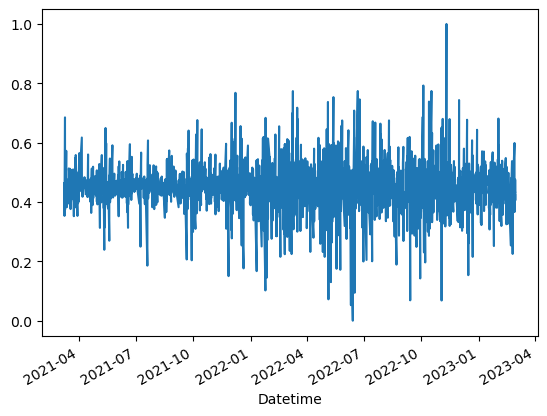

In [86]:
sp500['Adj Close'].plot()

In [87]:
def rnn_set(dt,set):
    x_train=list()
    for x in range(len(dt)-set):
        a=list([c] for c in dt[(x):(x+set)])
        # y_train=[y,y_train]
        x_train.append(a)
    return np.array(x_train)

In [88]:
rnn_set(sp500['Adj Close'],60).shape

(3424, 60, 1)

In [89]:
X_train=rnn_set(sp500['Adj Close'],60)[:3375]
X_train

array([[[0.46262574],
        [0.43964293],
        [0.46333273],
        ...,
        [0.46800025],
        [0.42231691],
        [0.38897526]],

       [[0.43964293],
        [0.46333273],
        [0.39410202],
        ...,
        [0.42231691],
        [0.38897526],
        [0.40948231]],

       [[0.46333273],
        [0.39410202],
        [0.35326316],
        ...,
        [0.38897526],
        [0.40948231],
        [0.39441969]],

       ...,

       [[0.31921366],
        [0.52708275],
        [0.39944114],
        ...,
        [0.48019865],
        [0.46750562],
        [0.43204213]],

       [[0.52708275],
        [0.39944114],
        [0.45269075],
        ...,
        [0.46750562],
        [0.43204213],
        [0.48596162]],

       [[0.39944114],
        [0.45269075],
        [0.47157146],
        ...,
        [0.43204213],
        [0.48596162],
        [0.3374573 ]]])

In [90]:
X_test=rnn_set(sp500['Adj Close'],60)[3375:]

In [91]:
y_train=np.array(sp500['Adj Close'][60:3375+60])

In [92]:
y_test=np.array(sp500['Adj Close'][3375+60:])

In [93]:
from tensorflow.keras.activations import *

In [94]:
model = Sequential() 
model.add(LSTM(500,return_sequences= True, input_shape=(X_train.shape[1],1))) 
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 500)           1004000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            110200    
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 1,134,451
Trainable params: 1,134,451
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.fit(X_train, y_train, epochs=200, batch_size=20, verbose=1)

Epoch 1/200
169/169 [==============================] - 3s 15ms/step - loss: 0.0043
Epoch 2/200
169/169 [==============================] - 2s 14ms/step - loss: 0.0043
Epoch 3/200
169/169 [==============================] - 2s 14ms/step - loss: 0.0044
Epoch 4/200
169/169 [==============================] - 2s 14ms/step - loss: 0.0043
Epoch 5/200
169/169 [==============================] - 2s 14ms/step - loss: 0.0043
Epoch 6/200
169/169 [==============================] - 2s 14ms/step - loss: 0.0043
Epoch 7/200
169/169 [==============================] - 2s 14ms/step - loss: 0.0043
Epoch 8/200
169/169 [==============================] - 2s 14ms/step - loss: 0.0043
Epoch 9/200
169/169 [==============================] - 2s 14ms/step - loss: 0.0043
Epoch 10/200
169/169 [==============================] - 2s 14ms/step - loss: 0.0043
Epoch 11/200
169/169 [==============================] - 2s 13ms/step - loss: 0.0043
Epoch 12/200
169/169 [==============================] - 2s 13ms/step - loss: 0.0043
E

KeyboardInterrupt: 

In [ ]:
plt.plot(pd.DataFrame(y_test))
plt.plot(pd.DataFrame(model.predict_generator(X_test)))

In [ ]:
pred=pd.DataFrame(model.predict_generator(X_test),columns=['Predicted']).diff()

In [ ]:
pred['Actual']=pd.DataFrame(y_test).diff()

In [ ]:
pred_TF=pd.DataFrame({"Predicted":pred['Predicted']>0,"Actual":pred['Actual']>0})

In [ ]:
pred_TF['xx']=pred_TF['Predicted']==pred_TF['Actual']

In [103]:
len(pred_TF[pred_TF['xx']==True])

25

In [104]:
len(pred_TF[pred_TF['xx']==False])

24

In [105]:
len(pred_TF[pred_TF['xx']==True]) / (len(pred_TF[pred_TF['xx']==True]) + len(pred_TF[pred_TF['xx']==False]))

0.5102040816326531

In [185]:
# import tensorflow as tf
# tf.keras.models.save_model(model, 'lstm_rnn1')

INFO:tensorflow:Assets written to: lstm_rnn1\assets


INFO:tensorflow:Assets written to: lstm_rnn1\assets


In [13]:
# import tensorflow.keras as tf
# lstm_rnn1 = tf.models.load_model('lstm_rnn1')

In [78]:
from sklearn.metrics import r2_score
r2_score(model.predict_generator(X_test), y_test)

-109480982.54636271

In [15]:
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series      
    """
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds

def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(X_test, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    
    #using our ranges we plot X_init
    #and test and actual preds
    plt.plot(sp500.index[3375+60:], y_test, color='orange')
    plt.plot(sp500.index[3375+60:], y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])